In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Linear Factor Models

# Performance Measurement

Risk_Factors.xlsx contains monthly observations of the risk-free rate and the three Fama–French risk factors (expressed as percentages, but without "%"), over the ten-year period from Jan 2004 through Dec 2013.

In [3]:
risk_factors = pd.read_excel("Risk_Factors.xlsx",index_col="Date")
risk_factors.head()

,Rf,Rm-Rf,SMB,HML
Date,,,,
200401,0.07,2.15,2.67,1.55
200402,0.06,1.40,-1.17,0.45
200403,0.09,-1.32,1.84,0.07
200404,0.08,-1.83,-2.59,-1.67
200405,0.06,1.17,-0.10,-0.33


Using excess returns for the ten industry portfolios, calculate the following performance metrics:

Sharpe ratio

Sortino ratio (using risk-free rate as target)

Treynor ratio (using CAPM β)

Jensen's α

Three-factor α

In [8]:
industry_portfolios = pd.read_excel("Industry_Portfolios.xlsx", index_col="Date")
industry_portfolios.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86


In [9]:
market_portfolio = pd.read_excel("Market_Portfolio.xlsx", index_col="Date")
market_portfolio.head()

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23


In [10]:
#connect them all together
data = pd.merge(market_portfolio, industry_portfolios, left_index=True, right_index=True, how = "inner")
data = pd.merge(data, risk_factors, left_index=True, right_index=True, how="inner")
data.head()

,Market,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Rf,Rm-Rf,SMB,HML
Date,,,,,,,,,,,,,,,
200401,2.22,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,0.07,2.15,2.67,1.55
200402,1.46,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,0.06,1.40,-1.17,0.45
200403,-1.23,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,0.09,-1.32,1.84,0.07
200404,-1.75,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,0.08,-1.83,-2.59,-1.67
200405,1.23,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,0.06,1.17,-0.10,-0.33


In [11]:
#calculate risk premium for all industries
data1 = data.copy()
cols = []
for i in industry_portfolios.columns:
    col = f"{i}-Rf"
    cols.append(col)
    data1[col] = data1[i] - data1["Rf"]

data1.head()

,Market,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,...,NoDur-Rf,Durbl-Rf,Manuf-Rf,Enrgy-Rf,HiTec-Rf,Telcm-Rf,Shops-Rf,Hlth-Rf,Utils-Rf,Other-Rf
Date,,,,,,,,,,,,,,,,,,,,,
200401,2.22,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,...,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
200402,1.46,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,...,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
200403,-1.23,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,...,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
200404,-1.75,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,...,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
200405,1.23,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,...,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80


In [12]:
data1[cols]

,NoDur-Rf,Durbl-Rf,Manuf-Rf,Enrgy-Rf,HiTec-Rf,Telcm-Rf,Shops-Rf,Hlth-Rf,Utils-Rf,Other-Rf
Date,,,,,,,,,,
200401,-0.01,-1.14,-0.69,0.37,4.46,1.34,0.38,3.02,1.85,2.81
200402,4.19,-0.13,1.89,4.63,-2.98,-0.58,6.03,0.83,2.01,2.10
200403,-0.18,-1.24,-0.36,-0.22,-2.64,-2.16,0.20,-4.05,1.04,-0.72
200404,1.34,2.22,-0.25,2.44,-4.99,-0.56,-2.78,3.46,-3.63,-3.84
200405,-1.95,-1.70,1.55,0.33,4.79,-3.01,0.24,-0.48,1.22,1.80
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [45]:
#sharpe_ratio E(Ri-Rf)/(var(Ri-Rf))**0.5
metrics = pd.DataFrame(data1[cols].apply(lambda x: np.mean(x)/np.std(x)))
metrics.columns = ["sharpe_ratio"]
metrics

,sharpe_ratio
NoDur-Rf,0.232068
Durbl-Rf,0.072659
Manuf-Rf,0.167315
Enrgy-Rf,0.182470
HiTec-Rf,0.119050
Telcm-Rf,0.169773
Shops-Rf,0.192557
Hlth-Rf,0.173253
Utils-Rf,0.211832
Other-Rf,0.064964


The sample semi-variance can be estimated as:

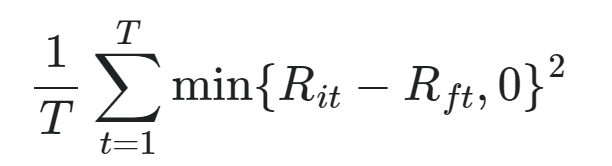

 where Ri is return on industry portfolio and Rf is risk-free rate.

In [46]:
#Sortino ratio (using risk-free rate as target) E(Ri-Rt)/(SV(Ri;Rt))**0.5
metrics["Sortino_ratio"] = (
    data1[cols]
    .apply(
        lambda x: 
        np.mean(x)
        /
        np.mean(np.clip(x,None,0)**2)**0.5
    )
)

In [83]:
#deg parameter represents the degree or order of the polynomial to fit [(Ri-Rf) = alpha + beta*(Rm-Rf)]
cofficients = np.polyfit(data1["Rm-Rf"],data1[cols[0]],deg=1)
slope = cofficients[0]
intercept = cofficients[1]
slope, intercept

(0.6537436627124878, 0.36971747606599686)

In [78]:
#Trynor ratio E(Ri-Rf)/Beta_i [(Ri-Rf) = alpha + beta*(Rm-Rf)]
metrics["Trynor_ratio"] = (
    pd.DataFrame(
        data1[cols]
        .apply(lambda y: 
               np.mean(y)
               /
               np.polyfit(data1["Rm-Rf"], y, deg=1)[0]
              )
    )
)

In [79]:
#Jensen's α  alpha = E(Ri-Rf)-Beta_i*E(Rm-Rf) [(Ri-Rf) = alpha + beta*(Rm-Rf)] same alpha
metrics["Jensen_alpha"] = pd.DataFrame(data1[cols].apply(lambda y: np.polyfit(data1["Rm-Rf"], y, deg=1)[1]))

In [50]:
#Jensen's α  E(Ri-Rf)-Beta_i*E(Rm-Rf)
# metrics["Jensen_alpha"]= (
#     pd.DataFrame(
#         data1[cols]
#         .apply(lambda x: 
#                np.mean(x)
#                -
#                np.polyfit(data1["Rm-Rf"], x, deg=1)[0]*np.mean(data1["Rm-Rf"])
#               )
#     )
# )

In [84]:
data2[["three_factor_alpha", "Rm-Rf", "SMB", "HML"]]

,three_factor_alpha,Rm-Rf,SMB,HML
Date,,,,
200401,1,2.15,2.67,1.55
200402,1,1.40,-1.17,0.45
200403,1,-1.32,1.84,0.07
200404,1,-1.83,-2.59,-1.67
200405,1,1.17,-0.10,-0.33
...,...,...,...,...
201308,1,-2.69,0.29,-2.46
201309,1,3.76,2.85,-1.59
201310,1,4.17,-1.56,1.31


In [85]:
#it shows paramater one by one [np.linalg.lstsq(x, y)]
#Ri-Rf = alpha + beta*(Rm-Rf) + gamma*(Rs-Rb) + delta*(Rh-Ri)
np.linalg.lstsq(data2[["three_factor_alpha", "Rm-Rf", "SMB", "HML"]], data2[cols[0]])[0]

array([ 0.38670449,  0.71213375, -0.22910221, -0.02334202])

In [86]:
#three-factor alpha
#Ri-Rf = alpha + beta*(Rm-Rf) + gamma*(Rs-Rb) + delta*(Rh-Ri)
data2 = data1.copy()
data2["three_factor_alpha"] = 1
metrics["three_factor_alpha"] = (
    data2[cols].apply(
        lambda y: 
        np.linalg.lstsq(
            data2[["three_factor_alpha", "Rm-Rf", "SMB", "HML"]]
            , y)[0][0]
    ) 
)

Create a table showing the performance metrics for the ten industry portfolios.

In [59]:
metrics.index = industry_portfolios.columns
metrics

,sharpe_ratio,Sortino_ratio,Trynor_ratio,Jensen_alpha,three_factor_alpha
NoDur,0.232068,0.350804,1.186372,0.369717,0.386704
Durbl,0.072659,0.111967,0.367463,-0.417903,-0.474342
Manuf,0.167315,0.241260,0.758251,0.160494,0.153285
Enrgy,0.182470,0.273612,1.143330,0.504485,0.523007
HiTec,0.119050,0.170620,0.564295,-0.064024,-0.065979
Telcm,0.169773,0.244940,0.836363,0.194348,0.200724
Shops,0.192557,0.293032,0.951258,0.274093,0.255941
Hlth,0.173253,0.270294,0.971435,0.236968,0.257472
Utils,0.211832,0.290044,1.452334,0.446523,0.474411
Other,0.064964,0.087351,0.299781,-0.387508,-0.404412


Plot your results as a bar chart for each performance metric.

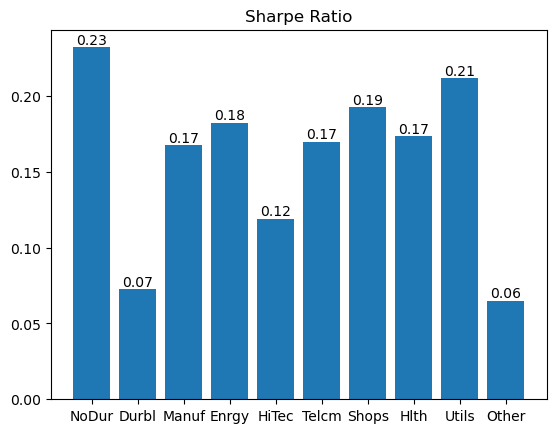

In [87]:
plt.bar(metrics.index, metrics["sharpe_ratio"])

for i in range(len(metrics["sharpe_ratio"])):
    plt.text(metrics.index[i], metrics["sharpe_ratio"][i], str(round(metrics["sharpe_ratio"][i],2)), ha='center', va='bottom')
    
plt.title("Sharpe Ratio")
plt.show()

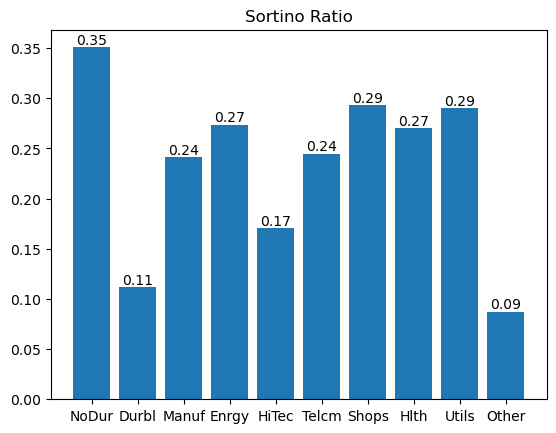

In [88]:
plt.bar(metrics.index, metrics["Sortino_ratio"])
plt.title("Sortino Ratio")

for i in range(len(metrics["Sortino_ratio"])):
    plt.text(metrics.index[i], metrics["Sortino_ratio"][i], str(round(metrics["Sortino_ratio"][i],2)), ha='center', va='bottom')
    

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


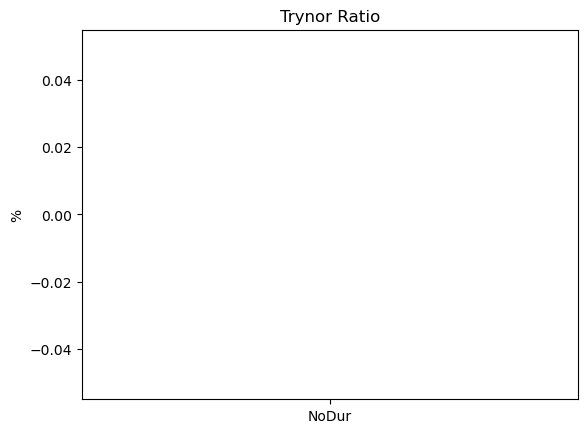

In [89]:
plt.bar(metrics.index, metrics["Trynor_ratio"])
plt.title("Trynor Ratio")
plt.ylabel("%")

for i in range(len(metrics["Trynor_ratio"])):
    plt.text(metrics.index[i], metrics["Trynor_ratio"][i], str(round(metrics["Trynor_ratio"][i],2)), ha='center', va='bottom')
    

plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


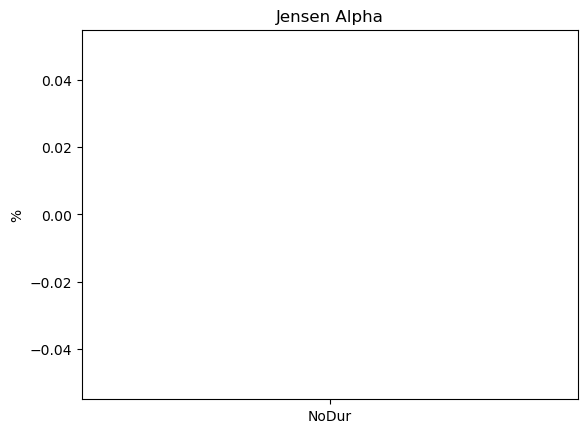

In [90]:
plt.bar(metrics.index, metrics["Jensen_alpha"])
plt.title("Jensen Alpha")
plt.ylabel("%")


for i in range(len(metrics["Jensen_alpha"])):
    if metrics["Jensen_alpha"][i] >= 0:
        va = "bottom"
    else:
        va = "top"
    plt.text(metrics.index[i], metrics["Jensen_alpha"][i], str(round(metrics["Jensen_alpha"][i],2)), ha='center', va=va)

plt.show()

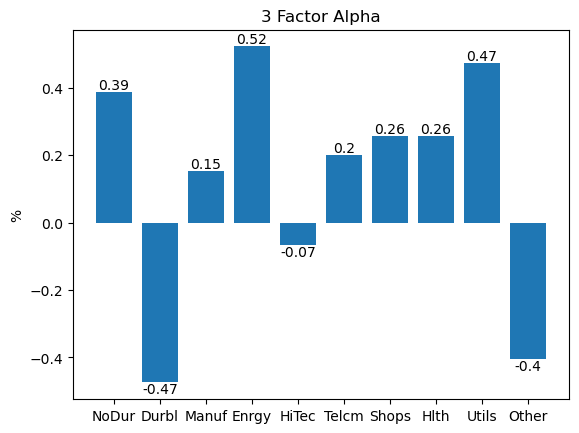

In [77]:
plt.bar(metrics.index, metrics["three_factor_alpha"])
plt.title("3 Factor Alpha")
plt.ylabel("%")

for i in range(len(metrics["three_factor_alpha"])):
    if metrics["three_factor_alpha"][i] >= 0:
        va = "bottom"
    else:
        va = "top"
    plt.text(metrics.index[i], metrics["three_factor_alpha"][i], str(round(metrics["three_factor_alpha"][i],2)), ha='center', va=va)
    
plt.show()

Briefly explain the economic significance of each of the three performance ratios (but not α's).

**Sharpe ratio represents risk premium per unit of total risk:**

**Includes idiosyncratic risk, which penalises individual investments and non-diversified portfolios**

**Implicitly assumes normal returns, so cannot distinguish between asymmetric return distributions with same variance but different skewness**

**Sortino ratio represents risk premium per unit of downside risk, which can distinguish between asymmetric return distributions with same variance but different skewness**

**Treynor ratio represents risk premium per unit of market risk, which ignores idiosyncratic risk as well as other types of systematic risk**